# Mapping the Networks

Mapping the networks with the location of the nodes as their latitude and longitude locations.

In [1]:
import contextily as cx
import matplotlib.pyplot as plt
from shapely.geometry import Point
import networkx as nx
import numpy as np
import geopandas as gpd
import os
import pandas as pd

In [2]:
output_centroids = "geo_files/EEZ_centroids.gpkg"
centroids = gpd.read_file(output_centroids)
centroids = centroids.to_crs("ESRI:54030")

# construct the array of coordinates for the centroid
coordinates = np.column_stack((centroids.GEONAME, centroids.geometry.x, centroids.geometry.y))
print(coordinates.shape)

(21, 3)


In [3]:
gdf = centroids.copy()

def shift_longitude(geom):
    x, y = geom.x, geom.y
    if x < 0:
        x += 360  # shift -180..0 to 180..360
    return Point(x, y)

gdf_pacific = centroids.to_crs("ESRI:54030")

gdf['geometry_shifted'] = gdf['geometry'].apply(shift_longitude)
gdf = gdf.set_geometry('geometry_shifted')


# Replace with the actual path to your downloaded shapefile
world = gpd.read_file("geo_files/ne_110m_admin_0_countries.shp")

fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.to_crs("ESRI:54030").plot(ax=ax, color='blue', markersize=10)



# # Plot
# fig, ax = plt.subplots(figsize=(10, 5))

# west, south, east, north = 100, -20, -60, 60 
# # 3. Set the map extent
# # ax.set_xlim(west, east)
# # ax.set_ylim(south, north)

# gdf_pacific.plot(ax=ax, color='blue', markersize=10)
# # cx.add_basemap(ax, crs="ESRI:54030")

# # Optional: Add background world map
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs("ESRI:54030")
# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# world.plot(ax=ax, color='lightgrey', edgecolor='black')


DataSourceError: Unable to open geo_files/ne_110m_admin_0_countries.shx or geo_files/ne_110m_admin_0_countries.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

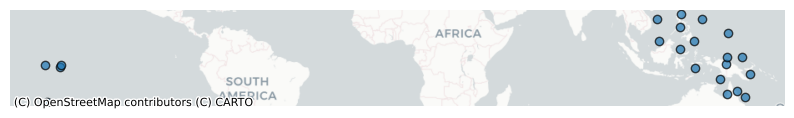

In [4]:
# centroids.to_crs(epsg=3857)
ax = centroids.plot(figsize=(10, 10), alpha=0.7, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
